# TimML Exercises

## Exercise 0. Single layer flow
Consider uniform flow from East to West. The gradient is 0.001. The hydraulic conductivity is $k=10$ m/d. The aquifer bottom and top are at 0 m and 10 m. The head at $x=-1000$ m and $y=0$ is fixed at 41 m. 

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

In [2]:
ml = Model(k=[10], zb=[0], zt=[10])

In [3]:
rf = Constant(ml, xr=-1000, yr=0, head=41)

In [4]:
uf = Uflow(ml, grad=0.001, angle=0)

In [5]:
ml.solve()

Starting solve
Number of elements:  2
Percent progress:  0  
size of matrix (1, 1)
Solution complete


grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


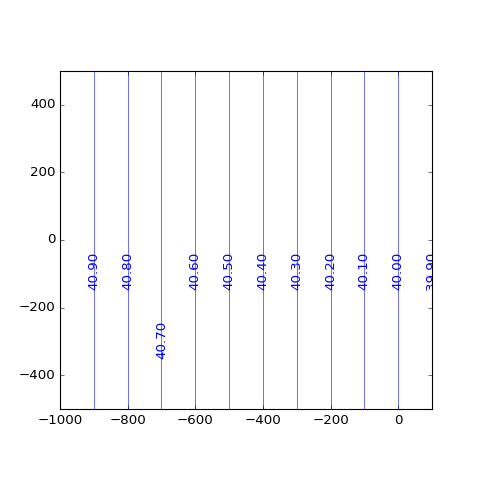

done with contouring


In [6]:
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))

A well is located at $(x,y)=(-400,0)$ with a discharge $Q=50$ m$^3$ and a radius of 0.2 m.

In [7]:
w = Well(ml, xw=-400, yw=0, Qw=50, rw=0.2)

Starting solve
Number of elements:  3
Percent progress:  0  
size of matrix (1, 1)
Solution complete
grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


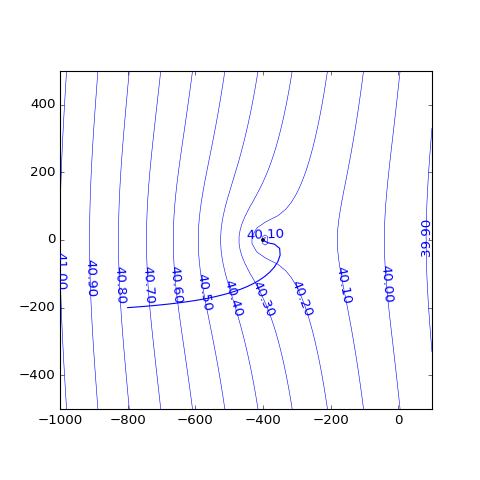

done with contouring
reached element of type well


In [8]:
ml.solve()
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
timtracelines(ml, xlist=[-800], ylist=[-200], zlist=[0], step=20)

### Exercise a
Draw 10 tracelines from $x=-800$ and different values of $y$.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


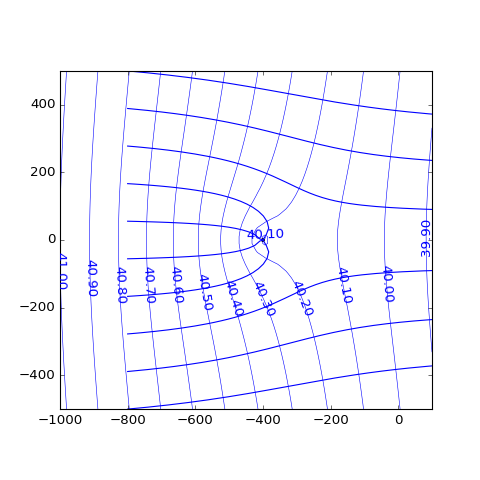

done with contouring
reached maximum number of steps
reached maximum number of steps
reached maximum number of steps
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached maximum number of steps
reached maximum number of steps
reached maximum number of steps


In [9]:
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
timtracelines(ml, xlist=10 * [-800], ylist=linspace(-500, 500, 10), zlist=10*[0], step=20)

### Exercise b
Quadruple the discharge of the well and reproduce the same figure

Starting solve
Number of elements:  3
Percent progress:  0  
size of matrix (1, 1)
Solution complete
grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


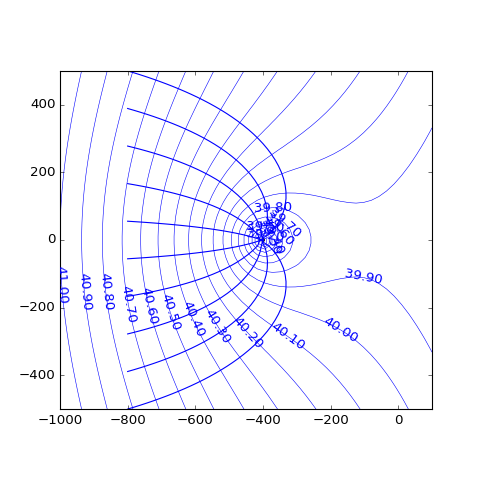

done with contouring
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
head at well: 37.8514940508


//anaconda/lib/python2.7/site-packages/matplotlib/contour.py:380: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


In [10]:
ml = Model(k=[10], zb=[0], zt=[10])
rf = Constant(ml, xr=-1000, yr=0, head=41)
uf = Uflow(ml, grad=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
ml.solve()
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
timtracelines(ml, xlist=10 * [-800], ylist=linspace(-500, 500, 10), zlist=10*[0], step=20)
print 'head at well:', ml.head(0, -400, 0)

### Add a river
A river runs along $x=0$. The water level in the river is at 40 m.

Starting solve
Number of elements:  4
Percent progress:  0  
size of matrix (2, 2)
Solution complete
grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


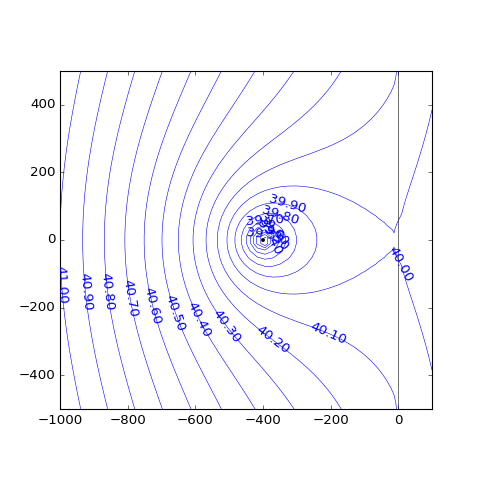

done with contouring
head at well: 37.9087094036


In [11]:
ls1 = HeadLineSink(ml, 0, -500, 0, 500, 40)
ml.solve()
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
print 'head at well:', ml.head(0, -400, 0)

### Exercise c
Simulate the river with 20 line-sinks from $y=-800$ to $y=800$. 

Starting solve
Number of elements:  23
Percent progress:  0 10 20 30 40 50 60 70 80 90 100  
size of matrix (21, 21)
Solution complete
grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


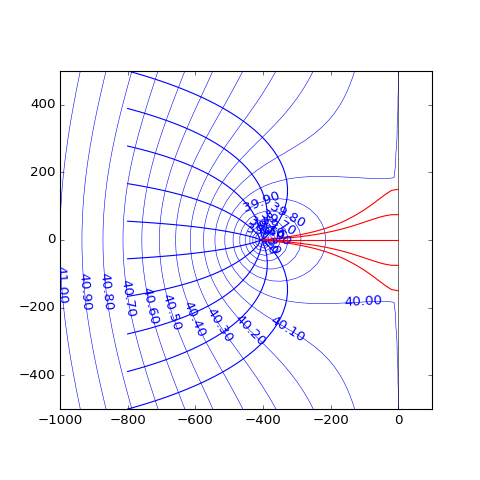

done with contouring
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well


In [12]:
ml = Model(k=[10], zb=[0], zt=[10])
rf = Constant(ml, xr=-1000, yr=0, head=41)
uf = Uflow(ml, grad=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
yls = linspace(-800, 800, 21)
for i in range(20):
    HeadLineSink(ml, 0, yls[i], 0, yls[i+1], 40)
ml.solve()
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
timtracelines(ml, xlist=10 * [-800], ylist=linspace(-500, 500, 10), zlist=10*[0], step=20)
timtracelines(ml, xlist=5 * [-0.01], ylist=linspace(-150, 150, 5), zlist=5*[0], step=20, color='r')

### Capture zone
Create a five year capture zone. The `capturezone` command only works after a contour plot

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


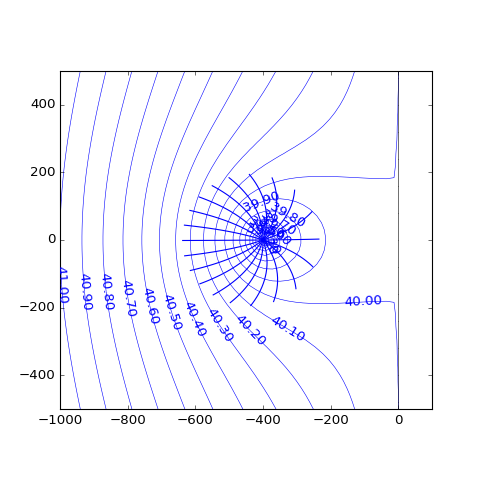

done with contouring
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax


In [13]:
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
capturezone(ml, w=w, N=20, z=0, tmax=5 * 365.25)

### Exercise d
Create a 20 year capture zone using 20 tracelines.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


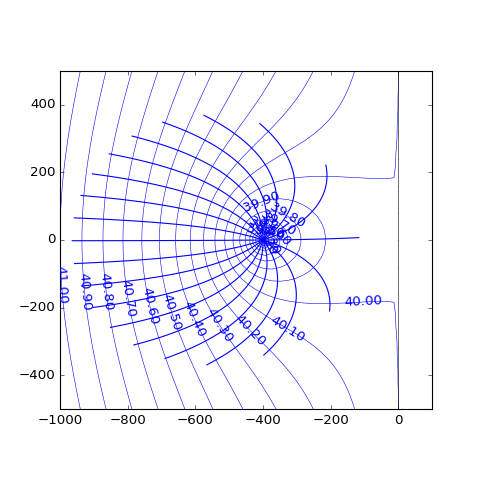

done with contouring
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax


In [14]:
timcontour(ml, -1000, 100, 50, -500, 500, 50, levels=[39, 42, 0.1], labels=True, size=(6,6))
capturezone(ml, w=w, N=20, z=0, tmax=20 * 365.25)